In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.integrate as sci
import scipy as spy
import scipy.sparse as sparse
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve
from scipy import interpolate
from scipy.optimize import root
from random import *

# Newton 1D

In [3]:
def f(x): return np.sin(x)

def fp(x): return np.cos(x)

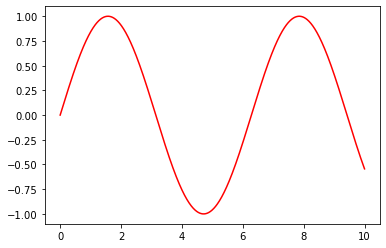

In [4]:
Vx = np.linspace(0,10,1000)
plt.plot(Vx,f(Vx),"-r")

In [5]:
def Dichotomie(f,a,b,Nb) :
    x=np.zeros(Nb+1)
    y=np.zeros(Nb+1)
    x[0] = a
    y[0] = b
    for n in range(Nb):
        c = (x[n] + y[n])/2
        if f(x[n])*f(c)<0:
            x[n+1]=x[n]
            y[n+1]=c
        if f(c)*f(y[n])<0:
            x[n+1]=c
            y[n+1]=y[n]
    return x[-1]

In [10]:
print(Dichotomie(f,6,7,5)-np.pi)
print([Dichotomie(f,3,4,N)-np.pi for N in [2,5,8]])


3.139657346410207
[-0.14159265358979312, -0.016592653589793116, -0.000967653589793116]


In [19]:
def f(x): return np.sin(x)

def fp(x): return np.cos(x)

In [20]:
def Newton(f,fp,x0,Nb) :
    xn=x0
    for i in range(Nb):
        xnp1 = xn -f(xn)/fp(xn)
        xn = xnp1
    return xn

In [21]:
def Newton1(f,fp,x0,Nb) :
    x=np.zeros(Nb+1)
    x[0] = x0
    for n in range(Nb):
        x[n+1] = x[n] -f(x[n])/fp(x[n])
    return x[-1]

In [23]:
print(Newton(f,fp,2,5))
#print(Newton1(f,fp,2,5))

print(Newton(f,fp,1,5))
print(Newton(f,fp,1.55,5))
print(Newton(f,fp,1.56,5))
print(Newton(f,fp,1.57,5))
print(Newton(f,fp,1.58,5))
print(Newton(f,fp,1.59,5))

print([Newton(f,fp,2,N)-np.pi for N in range(7)])

3.1415926536808043
0.0
-47.1238898038469
-91.106186954104
-1253.4954687823274
109.95574287564277
53.40707511102649
[-1.1415926535897931, 1.0434472096717258, -0.6736989790751271, 0.12459362397931306, -0.00064874127215786, 9.101119857746198e-11, 0.0]


# Newton 2D

In [35]:
def f2D(X): return [X[0]*X[0]+X[1]*X[1]-2,X[0]*X[0]-X[1]*X[1]-1]

def Df2D(X): return ([[2*X[0],2*X[1]],[2*X[0],-2*X[1] ]])


In [31]:
def Newton2D(f,Df,X0,Nb) :
    Xn=X0
    for i in range(Nb):
        Xnp1 = Xn -np.linalg.inv(Df(Xn)).dot(f(Xn))
        Xn = Xnp1
    return Xn

In [43]:
print(Newton2D(f2D,Df2D,np.array([1,1]),2)-[np.sqrt(3/2),np.sqrt(1/2)])
print(Newton2D(f2D,Df2D,np.array([-1,1]),20))
print(Newton2D(f2D,Df2D,np.array([-1,-1]),20))
print(Newton2D(f2D,Df2D,np.array([1,-1]),20))
print(Newton2D(f2D,Df2D,np.array([0.001,0.001]),20))



print([Newton2D(f2D,Df2D,np.array([1,1]),N)-[np.sqrt(3/2),np.sqrt(1/2)] for N in range(6)])

[0.00025513 0.00122655]
[-1.22474487  0.70710678]
[-1.22474487 -0.70710678]
[ 1.22474487 -0.70710678]
[1.22474487 0.70710678]
[array([-0.22474487,  0.29289322]), array([0.02525513, 0.04289322]), array([0.00025513, 0.00122655]), array([2.65675948e-08, 1.06195071e-06]), array([4.44089210e-16, 7.97362176e-13]), array([0., 0.])]
